In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
import PIL
from io import BytesIO
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import os

import keras
%matplotlib inline

Using TensorFlow backend.


In [3]:
#designating the directory for that we need to access, change this accordingly
dir_name = '/Users/PwintMin/Documents/GitHub/PizzaPie/Test'
for photos in os.listdir(dir_name):
    print(photos)

pizza_0000.jpg
pizza_0001.jpg
pizza_0002.jpg
pizza_0003.jpg
pizza_0004.jpg
pizza_0005.jpg
pizza_0006.jpg
pizza_0007.jpg
pizza_0008.jpg
pizza_0009.jpg
pizza_0010.jpg
pizza_0011.jpg
pizza_0012.jpg
pizza_0013.jpg
pizza_0014.jpg
pizza_0015.jpg
pizza_0016.jpg
pizza_0017.jpg
pizza_0018.jpg
pizza_0019.jpg
pizza_0020.jpg
pizza_0021.jpg
pizza_0022.jpg
pizza_0023.jpg
pizza_0024.jpg
pizza_0025.jpg
pizza_0026.jpg
pizza_0027.jpg
pizza_0028.jpg
pizza_0029.jpg
pizza_0030.jpg
pizza_0031.jpg
pizza_0032.jpg
pizza_0033.jpg
pizza_0034.jpg
pizza_0035.jpg
pizza_0036.jpg
pizza_0037.jpg
pizza_0038.jpg
pizza_0039.jpg
pizza_0040.jpg
pizza_0041.jpg
pizza_0042.jpg
pizza_0043.jpg
pizza_0044.jpg
pizza_0045.jpg
pizza_0046.jpg
pizza_0047.jpg
pizza_0048.jpg
pizza_0049.jpg
pizza_0050.jpg
pizza_0051.jpg
pizza_0052.jpg
pizza_0053.jpg
pizza_0054.jpg
pizza_0055.jpg
pizza_0056.jpg
pizza_0057.jpg
pizza_0058.jpg
pizza_0059.jpg
pizza_0060.jpg
pizza_0061.jpg
pizza_0062.jpg
pizza_0063.jpg
pizza_0064.jpg
pizza_0065.jpg
pizza_0066

In [4]:

import os
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

Will store images in directory /Users/PwintMin/Documents/GitHub/PizzaPie/Test


In [5]:
# Importing and setting up the vgg16 pre trained deep network
pre_trained = 'vgg16'

# Load appropriate packages
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
if pre_trained == 'xception':
    from keras.applications.xception import decode_predictions, preprocess_input
elif pre_trained == 'vgg16':
    from keras.applications.vgg16 import decode_predictions, preprocess_input    
else:
    raise Exception("Unknown model")

In [6]:
#Getting the Weights from ImageNet
if pre_trained == 'xception':
    model = Xception(weights='imagenet',input_shape=(299,299,3))
else:
    model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 55s 0us/step


In [7]:
model.input_shape

(None, 224, 224, 3)

In [9]:
#This should be the number of images within your file
batch_size = 215
nrow = model.input_shape[1]
ncol = model.input_shape[2]
nchan = model.input_shape[3]
batch_shape = (batch_size,nrow,ncol,nchan)
x = np.zeros(batch_shape)

In [10]:
dir_name = 'Test'
class_name = 'pizza'
for i in range(batch_size):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_name,class_name, i)  
    x[i,:,:,:] = image.load_img(fn, target_size=(nrow, ncol))

In [11]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

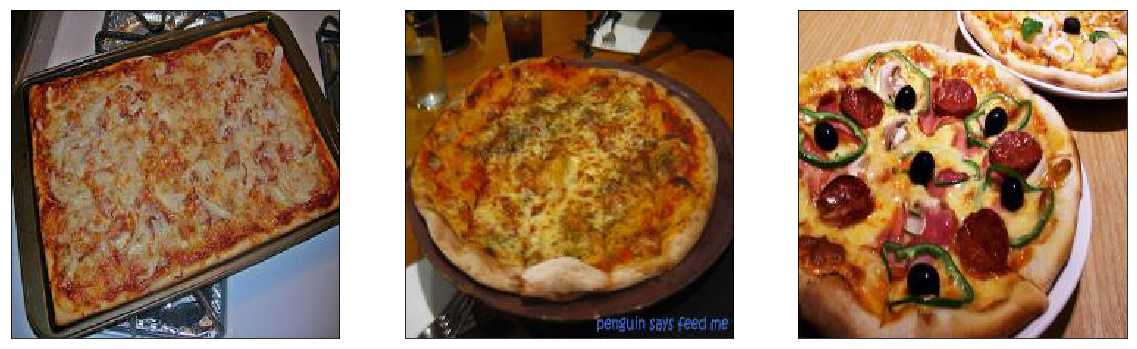

In [12]:
plt.figure(figsize=(20,20))
nplot = 3
for i in range(nplot):    
    plt.subplot(1,nplot,i+1)
    disp_image(x[i,:,:,:])

In [13]:
x = preprocess_input(x)

In [41]:
preds = model.predict(x)
preds_decoded = decode_predictions(preds,top=3)

In [55]:
ntop = 2

res_dict = {}
for i in range(ntop):
    class_name = []
    class_prob = []
    for j in range(batch_size):
        class_name.append(preds_decoded[j][i][1])
        class_prob.append(preds_decoded[j][i][2])

    name_col = str('class %d' % i)
    prob_col = str('prob %d' % i)
    res_dict[name_col] = class_name
    res_dict[prob_col] = class_prob
    
df = pd.DataFrame(data=res_dict)

In [61]:
print(df)

          class 0      class 1    prob 0    prob 1
0           pizza    meat_loaf  0.583333  0.127287
1           pizza       potpie  0.938192  0.035472
2           pizza       bakery  0.999202  0.000482
3           pizza    meat_loaf  0.891117  0.060124
4           pizza  pomegranate  0.997759  0.000598
5           pizza       potpie  0.954666  0.019785
6      frying_pan        pizza  0.233225  0.191212
7           pizza        bagel  0.818519  0.108147
8           pizza       trifle  0.991228  0.001781
9           pizza   frying_pan  0.998062  0.000778
10          pizza      burrito  0.959301  0.026968
11          pizza       hotdog  0.919092  0.018474
12          pizza        plate  0.615462  0.099410
13        toaster         corn  0.410424  0.097726
14          pizza        plate  0.982135  0.005160
15          pizza  pomegranate  0.570925  0.118654
16    pomegranate        pizza  0.710892  0.068183
17          pizza       potpie  0.999394  0.000158
18          pizza         menu 

0      0.127287
1      0.035472
2      0.000482
3      0.060124
4      0.000598
5      0.019785
6      0.191212
7      0.108147
8      0.001781
9      0.000778
10     0.026968
11     0.018474
12     0.099410
13     0.097726
14     0.005160
15     0.118654
16     0.068183
17     0.000158
18     0.088755
19     0.006787
20     0.020817
21     0.037486
22     0.041965
23     0.129323
24     0.011026
25     0.180792
26     0.179581
27     0.003839
28     0.070948
29     0.202349
         ...   
185    0.108665
186    0.069004
187    0.000157
188    0.091037
189    0.006782
190    0.020881
191    0.036955
192    0.041856
193    0.127405
194    0.011026
195    0.184576
196    0.174284
197    0.004089
198    0.070948
199    0.202544
200    0.117923
201    0.069712
202    0.063763
203    0.290325
204    0.015935
205    0.279830
206    0.076960
207    0.009847
208    0.383553
209    0.126099
210    0.071954
211    0.040380
212    0.300340
213    0.085058
214    0.038254
Name: prob 1, Length: 21